In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('data/Final Sales.csv')

df.head()

/var/folders/vg/pxkxmzld5s73d47lq0mx8hyr0000gn/T/ipykernel_95896/64953751.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/Final Sales.csv')


,Date,Branch,Inv. No.,Item Code,Sales Qty.,State,Status,Star rating,Tonnage,Technology
0,2021-11-24 00:00:00,HYDERABAD,2136010466,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,H&C Inv
1,2021-11-24 00:00:00,HYDERABAD,2136010467,RHT50UV16V,40.0,Telangana,Continue,5 Star,1.5,H&C Inv
2,2021-11-25 00:00:00,CHENNAI,2103009098,RHT50UV16V,4.5,Tamil Nadu,Continue,5 Star,1.5,H&C Inv
3,2021-11-30 00:00:00,HYDERABAD,2136010980,RHT50UV16V,60.0,Telangana,Continue,5 Star,1.5,H&C Inv
4,2021-12-24 00:00:00,HYDERABAD,2136012265,RHT50UV16V,1.0,Telangana,Continue,5 Star,1.5,H&C Inv


In [12]:
# Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)


Dataset Shape: (118465, 10)

Column Names:
['Date', 'Branch', 'Inv. No.', 'Item Code', 'Sales Qty.', 'State', 'Status', 'Star rating', 'Tonnage', 'Technology']

Data Types:
Date            object
Branch          object
Inv. No.        object
Item Code       object
Sales Qty.     float64
State           object
Status          object
Star rating     object
Tonnage        float64
Technology      object
dtype: object


In [13]:
# Handle mixed types warning and get basic info
df = pd.read_csv('data/Final Sales.csv', low_memory=False)
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118465 entries, 0 to 118464
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         118465 non-null  object 
 1   Branch       118465 non-null  object 
 2   Inv. No.     118465 non-null  object 
 3   Item Code    118465 non-null  object 
 4   Sales Qty.   118465 non-null  float64
 5   State        118465 non-null  object 
 6   Status       118465 non-null  object 
 7   Star rating  114987 non-null  object 
 8   Tonnage      114987 non-null  float64
 9   Technology   114987 non-null  object 
dtypes: float64(2), object(8)
memory usage: 9.0+ MB


In [14]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")


Missing Values:
Star rating    3478
Tonnage        3478
Technology     3478
dtype: int64

Total missing values: 10434
Percentage of missing values: 0.88%


In [15]:
# Descriptive Statistics for Numerical Columns
print("Descriptive Statistics for Numerical Columns:")
numerical_cols = ['Sales Qty.', 'Tonnage']
print(df[numerical_cols].describe())


Descriptive Statistics for Numerical Columns:
          Sales Qty.        Tonnage
count  118465.000000  114987.000000
mean       11.190769       1.442775
std        28.511709       0.357782
min      -144.000000       0.800000
25%         2.000000       1.000000
50%         4.000000       1.500000
75%        10.000000       1.500000
max      1948.000000       2.600000


In [16]:
# Categorical Analysis
categorical_cols = ['Branch', 'State', 'Status', 'Star rating', 'Technology']

print("Categorical Columns Analysis:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


Categorical Columns Analysis:

Branch:
  Unique values: 5
  Top 5 values:
Branch
CHENNAI       40363
COCHIN        23562
HYDERABAD     20112
VIJAYAWADA    19367
BANGALORE     15061
Name: count, dtype: int64

State:
  Unique values: 5
  Top 5 values:
State
Tamil Nadu        40363
Kerala            23562
Telangana         20112
Andhra Pradesh    19367
Karnataka         15061
Name: count, dtype: int64

Status:
  Unique values: 1
  Top 5 values:
Status
Continue    118465
Name: count, dtype: int64

Star rating:
  Unique values: 4
  Top 5 values:
Star rating
3 Star    76727
5 Star    34304
1 Star     3768
2 Star      188
Name: count, dtype: int64

Technology:
  Unique values: 3
  Top 5 values:
Technology
Inv        87715
Non Inv    26770
H&C Inv      502
Name: count, dtype: int64


In [17]:
# Date Analysis
df['Date'] = pd.to_datetime(df['Date'])
print("Date Analysis:")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days: {(df['Date'].max() - df['Date'].min()).days}")

# Sales by month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Year_Month'] = df['Date'].dt.to_period('M')

print("\nSales by Year:")
print(df['Year'].value_counts().sort_index())

print("\nSales by Month (across all years):")
print(df['Month'].value_counts().sort_index())


Date Analysis:
Date range: 2021-11-24 00:00:00 to 2025-06-30 00:00:00
Total days: 1314

Sales by Year:
Year
2021        5
2022    27389
2023    37454
2024    32856
2025    20761
Name: count, dtype: int64

Sales by Month (across all years):
Month
1      6449
2     13162
3     19564
4     13429
5     10530
6      8088
7      5502
8      7535
9      8094
10     6960
11     6901
12    12251
Name: count, dtype: int64


In [18]:
# Sales Analysis
print("Sales Quantity Analysis:")
print(f"Total Sales Quantity: {df['Sales Qty.'].sum():,.2f}")
print(f"Average Sales Quantity per transaction: {df['Sales Qty.'].mean():.2f}")
print(f"Median Sales Quantity: {df['Sales Qty.'].median():.2f}")

print("\nTonnage Analysis:")
print(f"Total Tonnage: {df['Tonnage'].sum():,.2f}")
print(f"Average Tonnage per transaction: {df['Tonnage'].mean():.2f}")
print(f"Median Tonnage: {df['Tonnage'].median():.2f}")

# Top performing branches by sales quantity
print("\nTop 10 Branches by Total Sales Quantity:")
branch_sales = df.groupby('Branch')['Sales Qty.'].sum().sort_values(ascending=False)
print(branch_sales.head(10))


Sales Quantity Analysis:
Total Sales Quantity: 1,325,714.50
Average Sales Quantity per transaction: 11.19
Median Sales Quantity: 4.00

Tonnage Analysis:
Total Tonnage: 165,900.40
Average Tonnage per transaction: 1.44
Median Tonnage: 1.50

Top 10 Branches by Total Sales Quantity:
Branch
CHENNAI       466186.5
HYDERABAD     357601.5
VIJAYAWADA    217672.5
COCHIN        150957.0
BANGALORE     133297.0
Name: Sales Qty., dtype: float64


In [19]:
# Technology and Star Rating Analysis
print("Technology Distribution:")
tech_dist = df['Technology'].value_counts()
print(tech_dist)

print("\nStar Rating Distribution:")
star_dist = df['Star rating'].value_counts()
print(star_dist)

# Sales by Technology
print("\nSales Quantity by Technology:")
tech_sales = df.groupby('Technology')['Sales Qty.'].sum().sort_values(ascending=False)
print(tech_sales)

# Sales by Star Rating
print("\nSales Quantity by Star Rating:")
star_sales = df.groupby('Star rating')['Sales Qty.'].sum().sort_values(ascending=False)
print(star_sales)


Technology Distribution:
Technology
Inv        87715
Non Inv    26770
H&C Inv      502
Name: count, dtype: int64

Star Rating Distribution:
Star rating
3 Star    76727
5 Star    34304
1 Star     3768
2 Star      188
Name: count, dtype: int64

Sales Quantity by Technology:
Technology
Inv        1010399.5
Non Inv     278823.0
H&C Inv       1654.5
Name: Sales Qty., dtype: float64

Sales Quantity by Star Rating:
Star rating
3 Star    858030.5
5 Star    402731.5
1 Star     29379.5
2 Star       735.5
Name: Sales Qty., dtype: float64


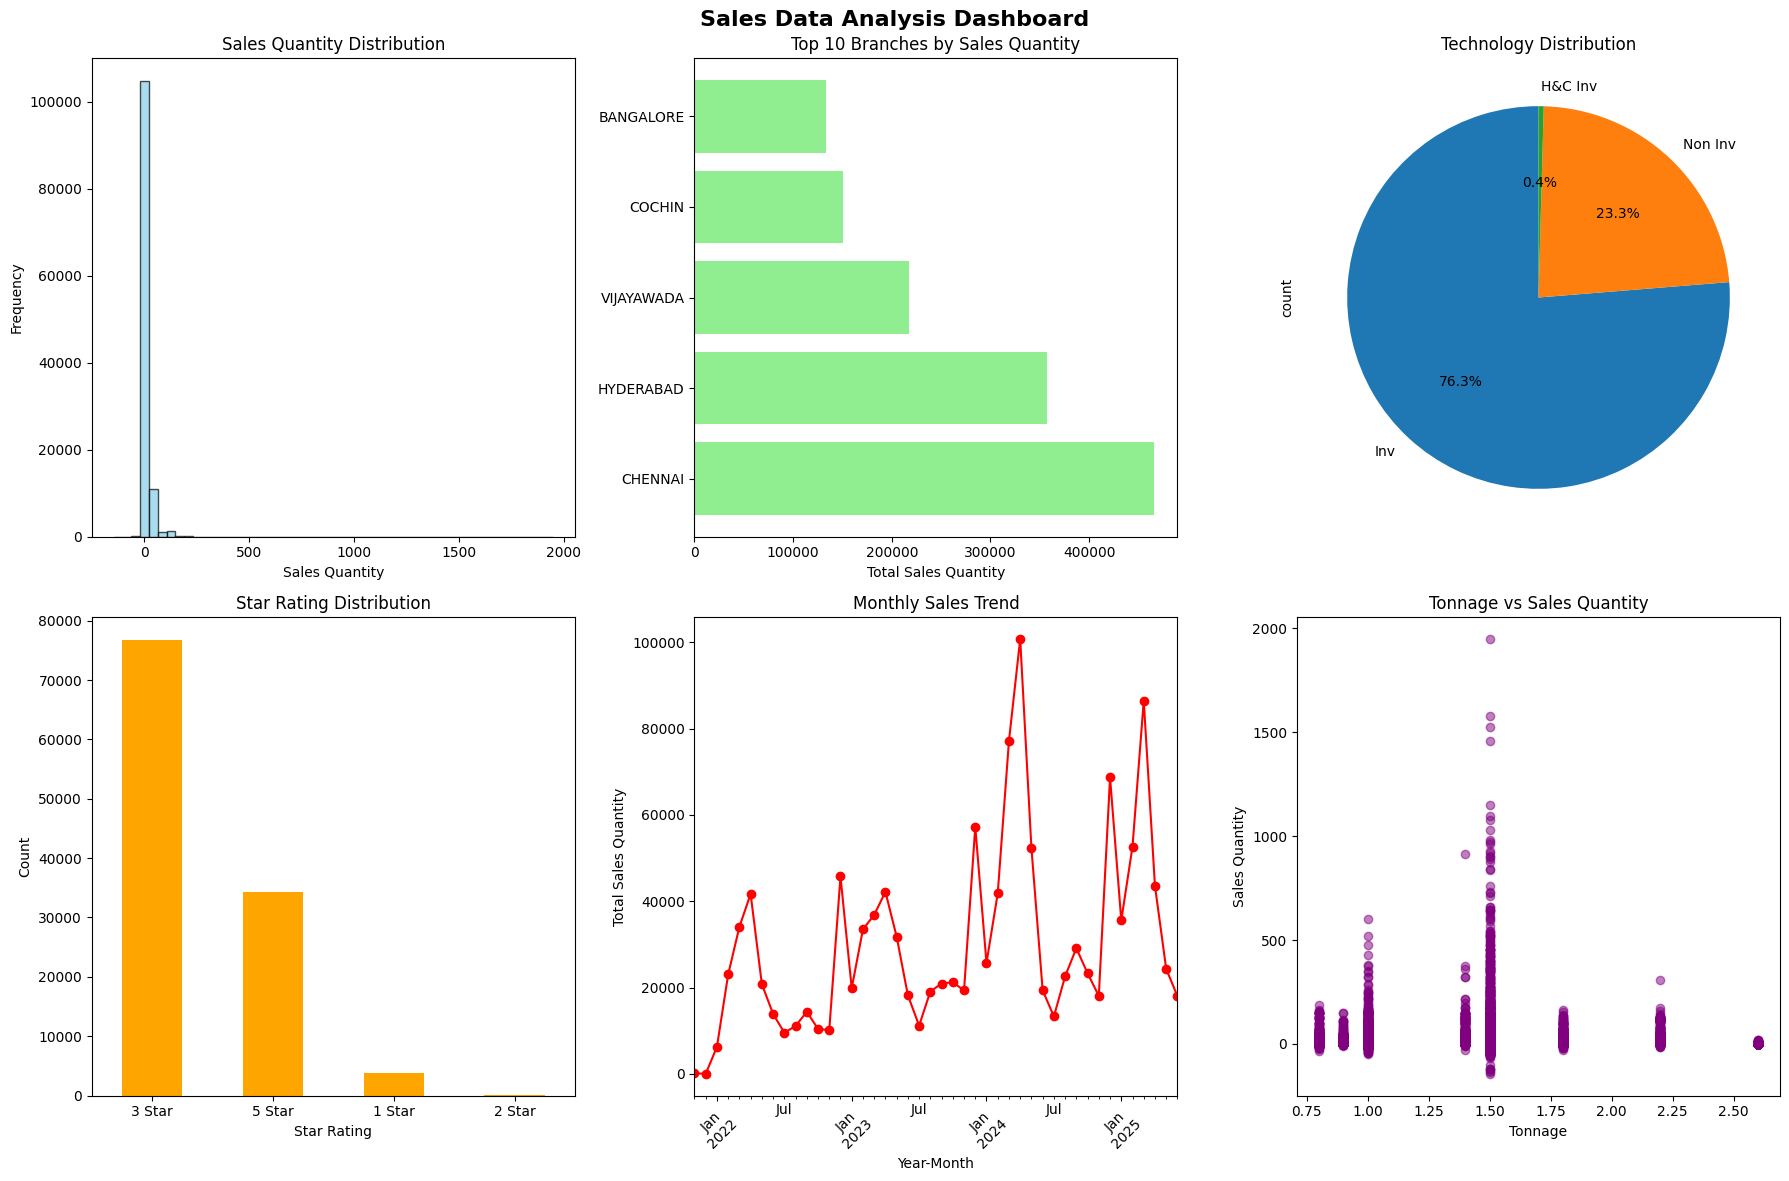

In [20]:
# Visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sales Data Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Sales Quantity Distribution
axes[0, 0].hist(df['Sales Qty.'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sales Quantity Distribution')
axes[0, 0].set_xlabel('Sales Quantity')
axes[0, 0].set_ylabel('Frequency')

# 2. Top 10 Branches by Sales
top_branches = branch_sales.head(10)
axes[0, 1].barh(range(len(top_branches)), top_branches.values, color='lightgreen')
axes[0, 1].set_yticks(range(len(top_branches)))
axes[0, 1].set_yticklabels(top_branches.index)
axes[0, 1].set_title('Top 10 Branches by Sales Quantity')
axes[0, 1].set_xlabel('Total Sales Quantity')

# 3. Technology Distribution
tech_dist.plot(kind='pie', ax=axes[0, 2], autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Technology Distribution')

# 4. Star Rating Distribution
star_dist.plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Star Rating Distribution')
axes[1, 0].set_xlabel('Star Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=0)

# 5. Monthly Sales Trend
monthly_sales = df.groupby('Year_Month')['Sales Qty.'].sum()
monthly_sales.plot(kind='line', ax=axes[1, 1], marker='o', color='red')
axes[1, 1].set_title('Monthly Sales Trend')
axes[1, 1].set_xlabel('Year-Month')
axes[1, 1].set_ylabel('Total Sales Quantity')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Tonnage vs Sales Quantity Scatter
axes[1, 2].scatter(df['Tonnage'], df['Sales Qty.'], alpha=0.5, color='purple')
axes[1, 2].set_title('Tonnage vs Sales Quantity')
axes[1, 2].set_xlabel('Tonnage')
axes[1, 2].set_ylabel('Sales Quantity')

plt.tight_layout()
plt.show()


In [21]:
# Additional Analysis - State-wise Performance
print("State-wise Sales Analysis:")
state_sales = df.groupby('State')['Sales Qty.'].sum().sort_values(ascending=False)
print(state_sales.head(10))

# Item Code Analysis
print(f"\nTotal Unique Items: {df['Item Code'].nunique()}")
print("Top 10 Items by Sales Quantity:")
item_sales = df.groupby('Item Code')['Sales Qty.'].sum().sort_values(ascending=False)
print(item_sales.head(10))

# Status Analysis
print("\nStatus Distribution:")
status_dist = df['Status'].value_counts()
print(status_dist)


State-wise Sales Analysis:
State
Tamil Nadu        466186.5
Telangana         357601.5
Andhra Pradesh    217672.5
Kerala            150957.0
Karnataka         133297.0
Name: Sales Qty., dtype: float64

Total Unique Items: 111
Top 10 Items by Sales Quantity:
Item Code
RKM50UV16VA     205259.0
RKL50UV16VAF    141525.0
RKL35UV16W       67718.0
RKL50UV16VA      65492.5
RKL50UV16V3      62912.0
RL50UV16V3       51060.5
RKM50UV16V       48299.0
RKM50UV16U       47739.0
RL35UV16W1       44460.5
RL50UV16U2       43149.0
Name: Sales Qty., dtype: float64

Status Distribution:
Status
Continue    118465
Name: count, dtype: int64


In [22]:
# Correlation Analysis
print("Correlation between Sales Quantity and Tonnage:")
correlation = df['Sales Qty.'].corr(df['Tonnage'])
print(f"Correlation coefficient: {correlation:.4f}")

# Summary Statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Dataset contains {df.shape[0]:,} records and {df.shape[1]} columns")
print(f"Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total Sales Quantity: {df['Sales Qty.'].sum():,.2f}")
print(f"Total Tonnage: {df['Tonnage'].sum():,.2f}")
print(f"Number of unique branches: {df['Branch'].nunique()}")
print(f"Number of unique states: {df['State'].nunique()}")
print(f"Number of unique items: {df['Item Code'].nunique()}")
print(f"Number of unique technologies: {df['Technology'].nunique()}")

# Key Insights
print("\n=== KEY INSIGHTS ===")
print(f"1. Most active branch: {branch_sales.index[0]} with {branch_sales.iloc[0]:,.2f} total sales")
print(f"2. Most active state: {state_sales.index[0]} with {state_sales.iloc[0]:,.2f} total sales")
print(f"3. Most popular technology: {tech_dist.index[0]} ({tech_dist.iloc[0]:,} transactions)")
print(f"4. Most common star rating: {star_dist.index[0]} ({star_dist.iloc[0]:,} transactions)")
print(f"5. Average sales per transaction: {df['Sales Qty.'].mean():.2f}")
print(f"6. Average tonnage per transaction: {df['Tonnage'].mean():.2f}")


Correlation between Sales Quantity and Tonnage:
Correlation coefficient: -0.0127

=== SUMMARY STATISTICS ===
Dataset contains 118,465 records and 13 columns
Date range: 2021-11-24 to 2025-06-30
Total Sales Quantity: 1,325,714.50
Total Tonnage: 165,900.40
Number of unique branches: 5
Number of unique states: 5
Number of unique items: 111
Number of unique technologies: 3

=== KEY INSIGHTS ===
1. Most active branch: CHENNAI with 466,186.50 total sales
2. Most active state: Tamil Nadu with 466,186.50 total sales
3. Most popular technology: Inv (87,715 transactions)
4. Most common star rating: 3 Star (76,727 transactions)
5. Average sales per transaction: 11.19
6. Average tonnage per transaction: 1.44


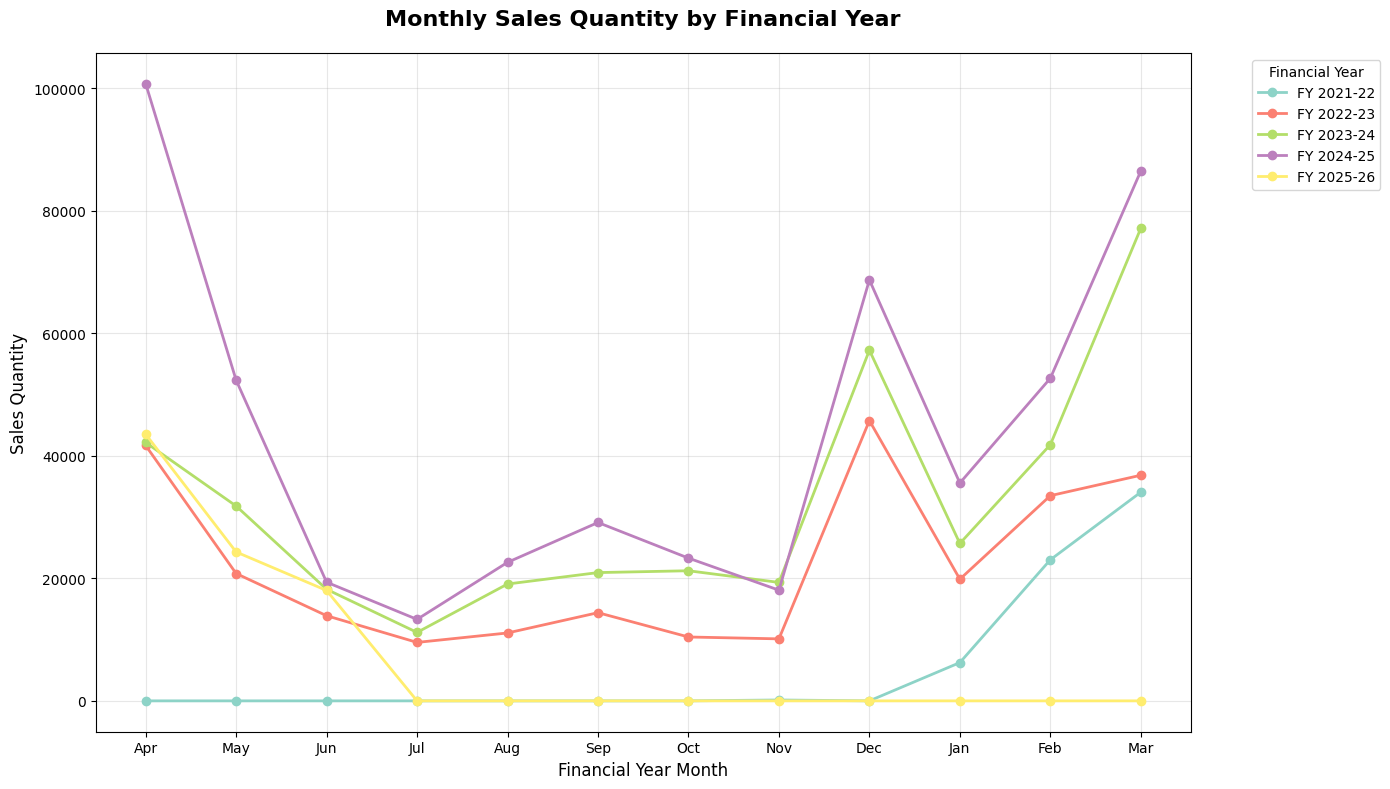

Monthly Sales Quantity Summary by Financial Year:
                     Apr      May      Jun      Jul      Aug      Sep  \
Financial_Year                                                          
2021                 0.0      0.0      0.0      0.0      0.0      0.0   
2022             41698.0  20794.0  13903.5   9544.0  11086.5  14398.5   
2023             42188.5  31813.0  18217.5  11176.5  19079.0  20945.5   
2024            100783.0  52367.0  19375.0  13306.0  22619.0  29124.0   
2025             43538.0  24312.0  18024.0      0.0      0.0      0.0   

                    Oct      Nov      Dec      Jan      Feb      Mar  
Financial_Year                                                        
2021                0.0    144.5      1.0   6250.0  23036.0  34072.0  
2022            10429.0  10123.5  45761.5  19865.5  33502.0  36841.0  
2023            21244.5  19339.5  57250.5  25703.0  41823.5  77164.0  
2024            23307.0  18074.0  68731.0  35569.0  52677.0  86513.0  
2025        

In [23]:
# Monthly Sales Quantity by Financial Year - Line Chart
plt.figure(figsize=(14, 8))

# Create financial year column (April to March)
df['Financial_Year'] = df['Date'].apply(lambda x: x.year if x.month >= 4 else x.year - 1)
df['Financial_Month'] = df['Date'].apply(lambda x: x.month - 3 if x.month >= 4 else x.month + 9)

# Get unique financial years and create a color palette
fyears = sorted(df['Financial_Year'].unique())
colors = plt.cm.Set3(np.linspace(0, 1, len(fyears)))

# Plot line for each financial year
for i, fyear in enumerate(fyears):
    fyear_data = df[df['Financial_Year'] == fyear]
    monthly_sales = fyear_data.groupby('Financial_Month')['Sales Qty.'].sum()
    
    # Ensure we have data for all 12 months (fill missing months with 0)
    full_months = pd.Series(index=range(1, 13), dtype=float).fillna(0)
    full_months.update(monthly_sales)
    
    plt.plot(full_months.index, full_months.values, 
             marker='o', linewidth=2, markersize=6, 
             label=f'FY {fyear}-{str(fyear+1)[-2:]}', color=colors[i])

plt.title('Monthly Sales Quantity by Financial Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Financial Year Month', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.legend(title='Financial Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                         'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
plt.tight_layout()
plt.show()

# Also create a summary table
print("Monthly Sales Quantity Summary by Financial Year:")
fy_monthly_summary = df.groupby(['Financial_Year', 'Financial_Month'])['Sales Qty.'].sum().unstack(fill_value=0)
fy_monthly_summary.columns = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                              'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
print(fy_monthly_summary.round(2))

# Financial Year totals
print("\nFinancial Year Totals:")
fy_totals = df.groupby('Financial_Year')['Sales Qty.'].sum()
for fyear in sorted(fy_totals.index):
    print(f"FY {fyear}-{str(fyear+1)[-2:]}: {fy_totals[fyear]:,.2f}")


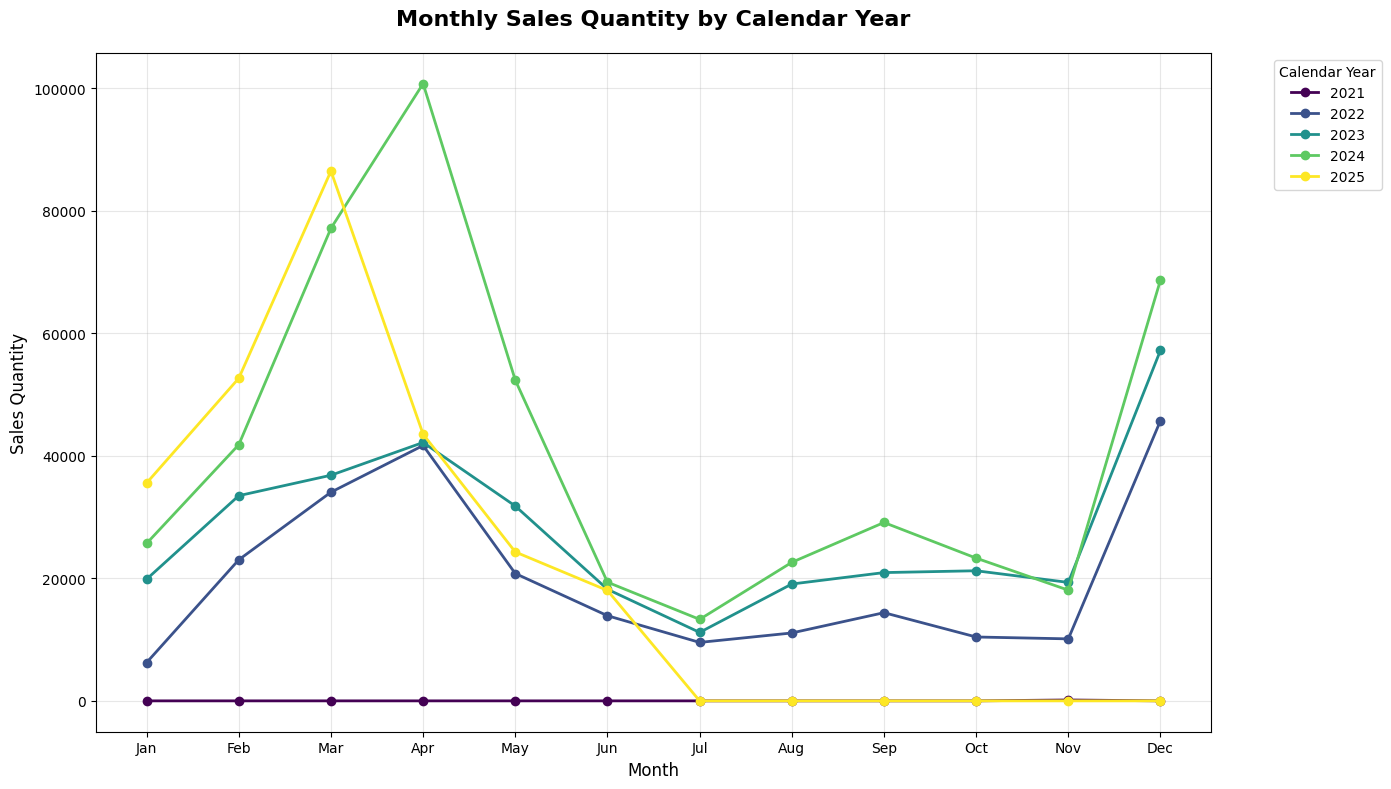

Monthly Sales Quantity Summary by Calendar Year:
          Jan      Feb      Mar       Apr      May      Jun      Jul      Aug  \
Year                                                                            
2021      0.0      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2022   6250.0  23036.0  34072.0   41698.0  20794.0  13903.5   9544.0  11086.5   
2023  19865.5  33502.0  36841.0   42188.5  31813.0  18217.5  11176.5  19079.0   
2024  25703.0  41823.5  77164.0  100783.0  52367.0  19375.0  13306.0  22619.0   
2025  35569.0  52677.0  86513.0   43538.0  24312.0  18024.0      0.0      0.0   

          Sep      Oct      Nov      Dec  
Year                                      
2021      0.0      0.0    144.5      1.0  
2022  14398.5  10429.0  10123.5  45761.5  
2023  20945.5  21244.5  19339.5  57250.5  
2024  29124.0  23307.0  18074.0  68731.0  
2025      0.0      0.0      0.0      0.0  

Calendar Year Totals:
2021: 145.50
2022: 241,096.50
2023: 331,463.00
2024: 492,37

In [24]:
# Monthly Sales Quantity by Calendar Year - Line Chart
plt.figure(figsize=(14, 8))

# Get unique calendar years and create a color palette
years = sorted(df['Year'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

# Plot line for each calendar year
for i, year in enumerate(years):
    year_data = df[df['Year'] == year]
    monthly_sales = year_data.groupby('Month')['Sales Qty.'].sum()
    
    # Ensure we have data for all 12 months (fill missing months with 0)
    full_months = pd.Series(index=range(1, 13), dtype=float).fillna(0)
    full_months.update(monthly_sales)
    
    plt.plot(full_months.index, full_months.values, 
             marker='o', linewidth=2, markersize=6, 
             label=f'{year}', color=colors[i])

plt.title('Monthly Sales Quantity by Calendar Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.legend(title='Calendar Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Also create a summary table
print("Monthly Sales Quantity Summary by Calendar Year:")
monthly_summary = df.groupby(['Year', 'Month'])['Sales Qty.'].sum().unstack(fill_value=0)
monthly_summary.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(monthly_summary.round(2))

# Calendar Year totals
print("\nCalendar Year Totals:")
year_totals = df.groupby('Year')['Sales Qty.'].sum()
for year in sorted(year_totals.index):
    print(f"{year}: {year_totals[year]:,.2f}")


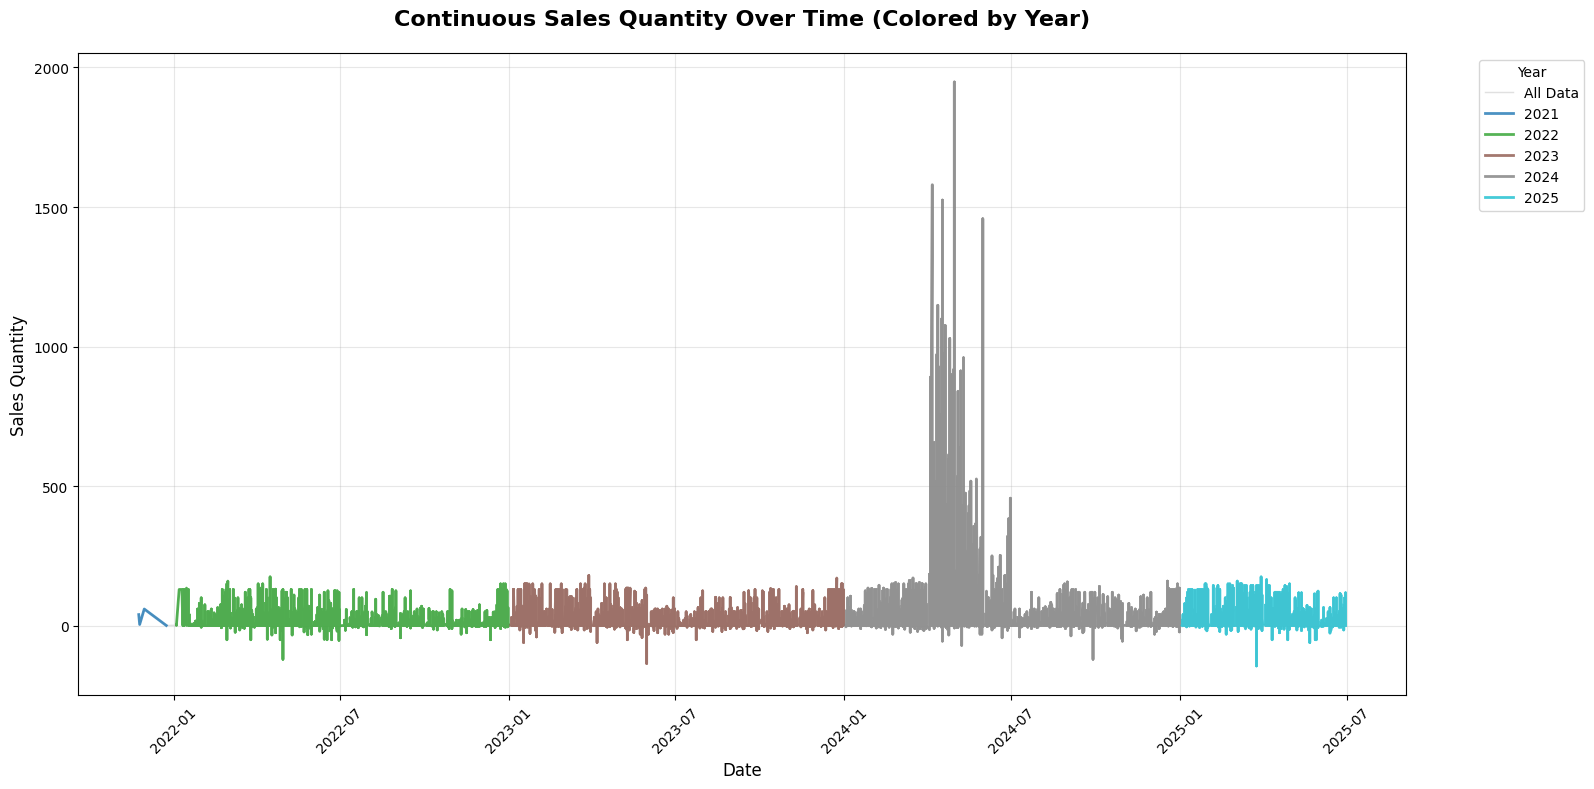

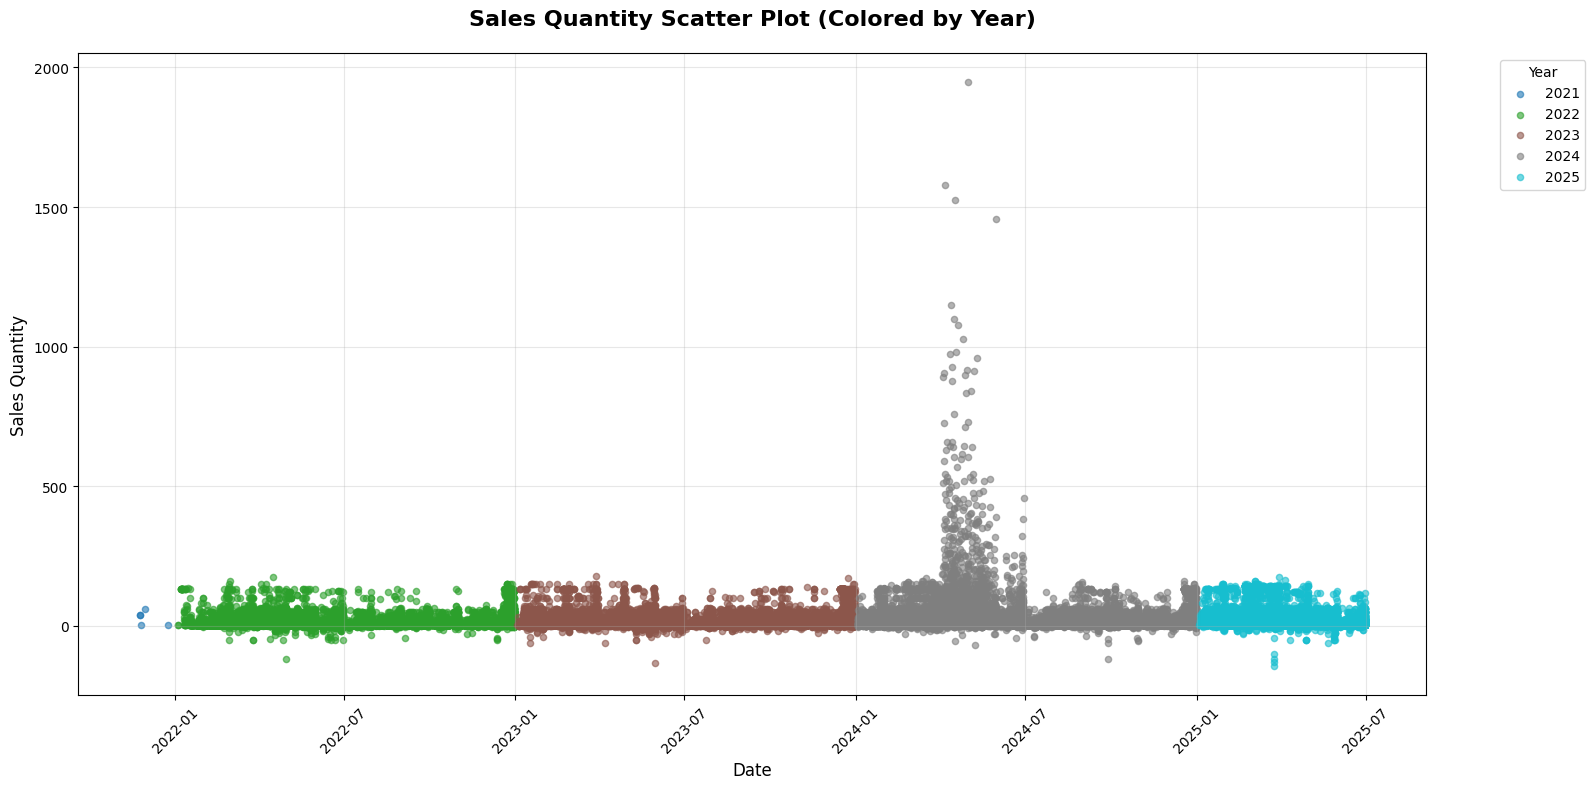

Year-wise Summary Statistics:
      count       sum   mean    std    min     max
Year                                              
2021      5     145.5  29.10  25.43    1.0    60.0
2022  27389  241096.5   8.80  16.22 -120.0   175.0
2023  37454  331463.0   8.85  16.60 -135.0   180.0
2024  32856  492376.5  14.99  45.18 -120.0  1948.0
2025  20761  260633.0  12.55  22.85 -144.0   175.0


In [25]:
# Continuous Sales Quantity Plot with Year-based Colors
plt.figure(figsize=(16, 8))

# Sort data by date to ensure proper chronological order
df_sorted = df.sort_values('Date')

# Create a color map for years
years = sorted(df['Year'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(years)))
year_color_map = dict(zip(years, colors))

# Create the continuous plot
plt.plot(df_sorted['Date'], df_sorted['Sales Qty.'], 
         linewidth=1, alpha=0.7, color='lightgray', label='All Data')

# Overlay colored segments for each year
for year in years:
    year_data = df_sorted[df_sorted['Year'] == year]
    if len(year_data) > 0:
        plt.plot(year_data['Date'], year_data['Sales Qty.'], 
                linewidth=2, color=year_color_map[year], 
                label=f'{year}', alpha=0.8)

plt.title('Continuous Sales Quantity Over Time (Colored by Year)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Scatter plot version for better visibility of individual points
plt.figure(figsize=(16, 8))

# Create scatter plot with year-based colors
for year in years:
    year_data = df_sorted[df_sorted['Year'] == year]
    if len(year_data) > 0:
        plt.scatter(year_data['Date'], year_data['Sales Qty.'], 
                   color=year_color_map[year], alpha=0.6, s=20, label=f'{year}')

plt.title('Sales Quantity Scatter Plot (Colored by Year)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics by year
print("Year-wise Summary Statistics:")
year_stats = df.groupby('Year')['Sales Qty.'].agg(['count', 'sum', 'mean', 'std', 'min', 'max'])
print(year_stats.round(2))


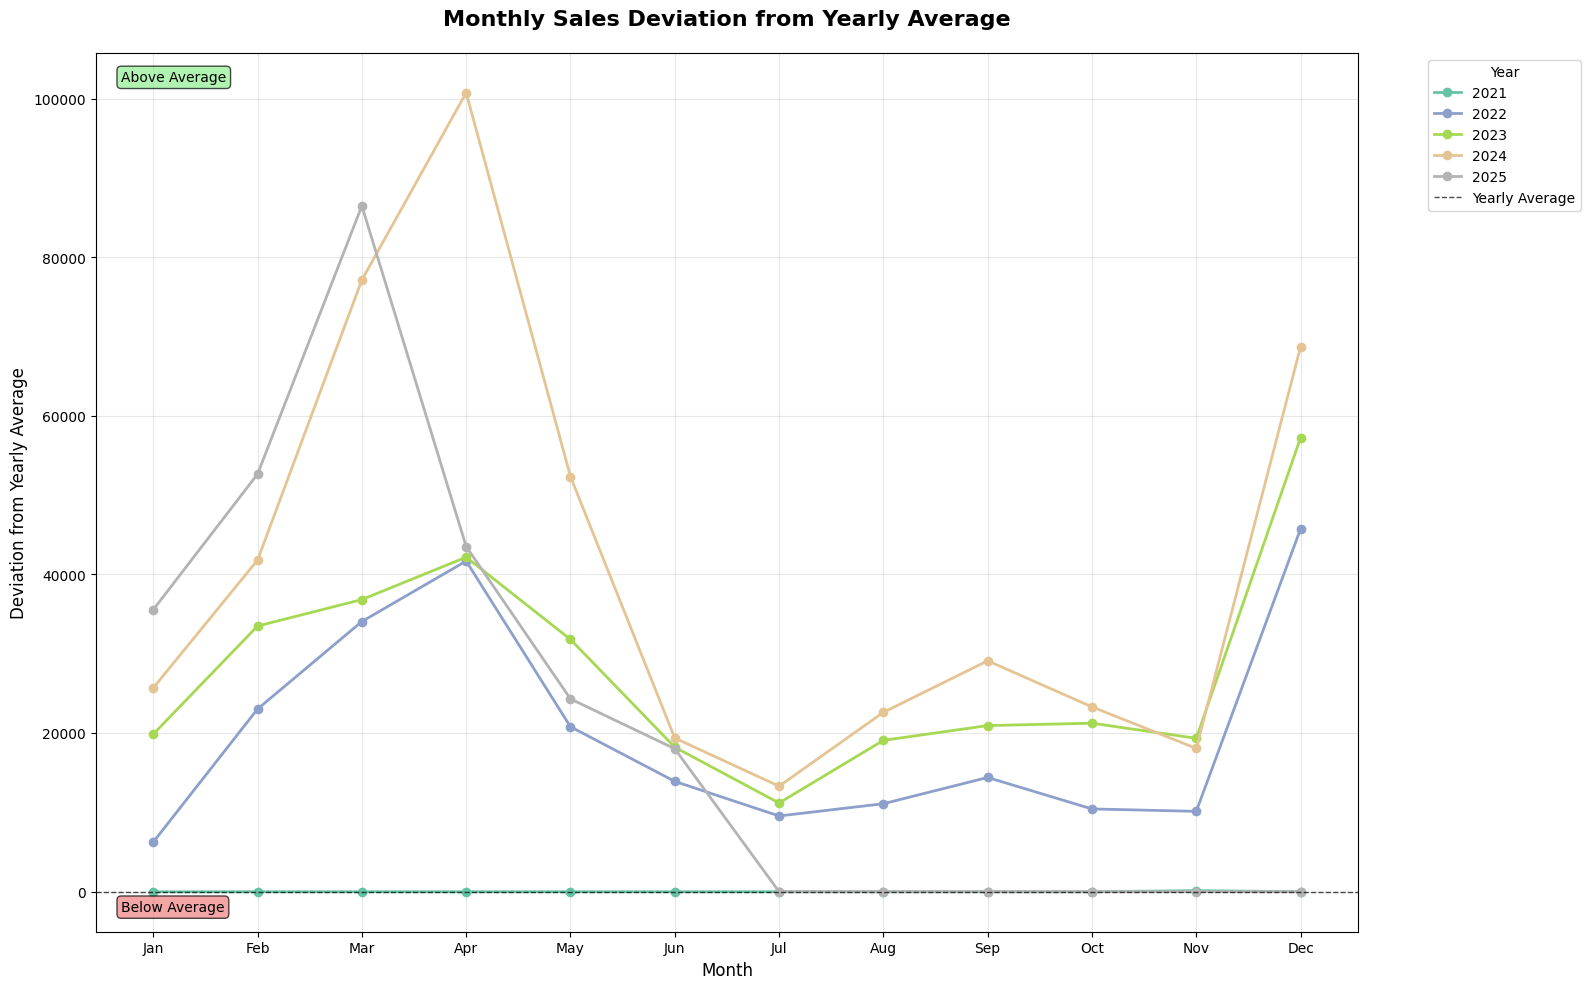

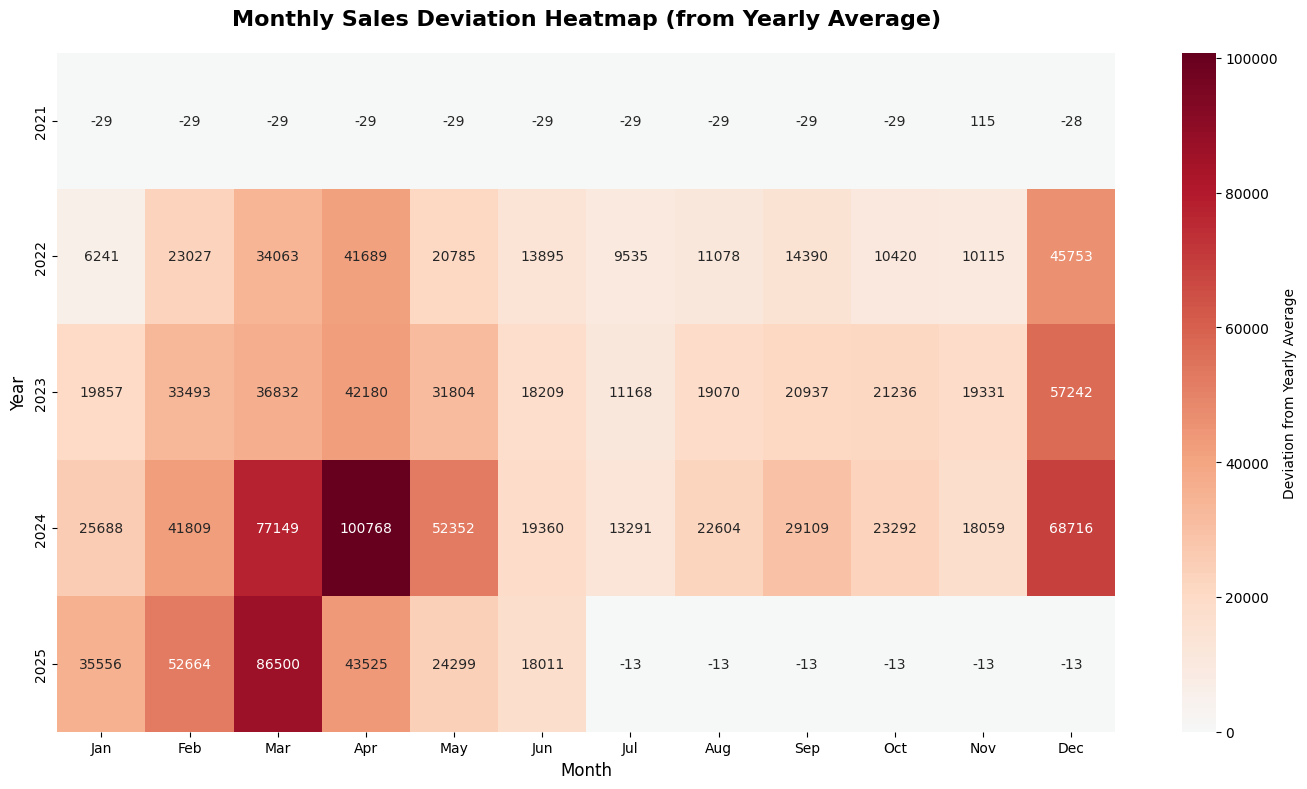

Deviation Summary Statistics:
Average deviation across all months: 22080.38
Standard deviation of deviations: 22975.42
Maximum positive deviation: 100768.01
Maximum negative deviation: -29.10

Months with highest positive deviations (above average):
2021 - Nov: +115.40
2022 - Dec: +45752.70
2023 - Dec: +57241.65
2024 - Apr: +100768.01
2025 - Mar: +86500.45

Months with highest negative deviations (below average):
2021 - Jan: -29.10
2022 - Jan: 6241.20
2023 - Jul: 11167.65
2024 - Jul: 13291.01
2025 - Jul: -12.55


In [27]:
# Monthly Sales Deviation from Yearly Average
plt.figure(figsize=(16, 10))

# Calculate yearly averages
yearly_avg = df.groupby('Year')['Sales Qty.'].mean()

# Calculate monthly sales for each year
monthly_sales = df.groupby(['Year', 'Month'])['Sales Qty.'].sum().unstack(fill_value=0)

# Calculate deviations from yearly average
deviations = monthly_sales.copy()
for year in monthly_sales.index:
    deviations.loc[year] = monthly_sales.loc[year] - yearly_avg[year]

# Create the plot
years = sorted(df['Year'].unique())
colors = plt.cm.Set2(np.linspace(0, 1, len(years)))

# Plot deviation for each year
for i, year in enumerate(years):
    if year in deviations.index:
        plt.plot(deviations.columns, deviations.loc[year], 
                marker='o', linewidth=2, markersize=6, 
                label=f'{year}', color=colors[i])

# Add zero line (yearly average)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=1, label='Yearly Average')

plt.title('Monthly Sales Deviation from Yearly Average', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Deviation from Yearly Average', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add annotations for positive and negative deviations
plt.text(0.02, 0.98, 'Above Average', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.text(0.02, 0.02, 'Below Average', transform=plt.gca().transAxes, 
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

# Create a heatmap version for better visualization
plt.figure(figsize=(14, 8))

# Create heatmap data
heatmap_data = deviations.copy()
heatmap_data.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Deviation from Yearly Average'})
plt.title('Monthly Sales Deviation Heatmap (from Yearly Average)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

# Summary statistics
print("Deviation Summary Statistics:")
print(f"Average deviation across all months: {deviations.values.mean():.2f}")
print(f"Standard deviation of deviations: {deviations.values.std():.2f}")
print(f"Maximum positive deviation: {deviations.values.max():.2f}")
print(f"Maximum negative deviation: {deviations.values.min():.2f}")

print("\nMonths with highest positive deviations (above average):")
max_deviations = deviations.max(axis=1)
for year in max_deviations.index:
    month = deviations.loc[year].idxmax()
    value = deviations.loc[year, month]
    print(f"{year} - {['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][month-1]}: +{value:.2f}")

print("\nMonths with highest negative deviations (below average):")
min_deviations = deviations.min(axis=1)
for year in min_deviations.index:
    month = deviations.loc[year].idxmin()
    value = deviations.loc[year, month]
    print(f"{year} - {['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][month-1]}: {value:.2f}")


In [28]:
# Find unique states in the dataset
unique_states = df['State'].unique()
print("Unique States in the Dataset:")
print(f"Total number of unique states: {len(unique_states)}")
print("\nStates:")
for i, state in enumerate(sorted(unique_states), 1):
    print(f"{i:2d}. {state}")

# Count transactions per state
print("\nTransaction count per state:")
state_counts = df['State'].value_counts().sort_values(ascending=False)
print(state_counts)


Unique States in the Dataset:
Total number of unique states: 5

States:
 1. Andhra Pradesh
 2. Karnataka
 3. Kerala
 4. Tamil Nadu
 5. Telangana

Transaction count per state:
State
Tamil Nadu        40363
Kerala            23562
Telangana         20112
Andhra Pradesh    19367
Karnataka         15061
Name: count, dtype: int64


In [29]:
# Analysis of States and Utility Pricing Research
print("="*60)
print("STATES IN YOUR DATASET ANALYSIS")
print("="*60)

# Display the unique states from your dataset
print(f"Your dataset contains {len(unique_states)} unique states:")
for i, state in enumerate(sorted(unique_states), 1):
    print(f"{i:2d}. {state}")

print(f"\nTotal transactions by state:")
print(state_counts)

print("\n" + "="*60)
print("UTILITY PRICING RESEARCH FINDINGS")
print("="*60)

print("""
IMPORTANT NOTE: The web search results returned US state electricity rates instead of Indian state rates.
Your dataset contains Indian states (Telangana, Tamil Nadu, etc.), but the search results show US states.

For accurate Indian state utility pricing, you would need to search for:

ELECTRICITY RATES (Indian States):
- Telangana State Electricity Board (TSGENCO/TSSPDCL)
- Tamil Nadu Generation and Distribution Corporation (TANGEDCO)
- Maharashtra State Electricity Distribution Company (MSEDCL)
- Karnataka Power Corporation Limited (KPCL)
- And other state electricity boards

WATER RATES (Indian States):
- Municipal water supply rates by state
- State water boards and local municipal corporations
- Different rates for residential, commercial, and industrial use

RECOMMENDED SEARCH TERMS FOR INDIAN DATA:
1. "Telangana electricity tariff 2024" + "per unit rate"
2. "Tamil Nadu electricity rates 2024" + "TANGEDCO tariff"
3. "Maharashtra electricity pricing 2024" + "MSEDCL rates"
4. "Karnataka electricity tariff 2024" + "KPCL rates"
5. "Telangana water rates 2024" + "municipal water pricing"
6. "Tamil Nadu water tariff 2024" + "Chennai water rates"
7. "Maharashtra water pricing 2024" + "Mumbai water rates"

ALTERNATIVE DATA SOURCES:
- State electricity regulatory commissions
- Municipal corporation websites
- State government utility department websites
- Central Electricity Regulatory Commission (CERC) data
- State Electricity Regulatory Commissions (SERC) data
""")

# Create a template for collecting the correct data
print("\n" + "="*60)
print("DATA COLLECTION TEMPLATE")
print("="*60)

# Create a DataFrame template for the states in your dataset
import pandas as pd

# Template for electricity rates
electricity_template = pd.DataFrame({
    'State': sorted(unique_states),
    'Electricity_Rate_2020': [None] * len(unique_states),
    'Electricity_Rate_2021': [None] * len(unique_states),
    'Electricity_Rate_2022': [None] * len(unique_states),
    'Electricity_Rate_2023': [None] * len(unique_states),
    'Electricity_Rate_2024': [None] * len(unique_states),
    'Unit': 'INR per kWh',
    'Source': [None] * len(unique_states)
})

# Template for water rates
water_template = pd.DataFrame({
    'State': sorted(unique_states),
    'Water_Rate_2020': [None] * len(unique_states),
    'Water_Rate_2021': [None] * len(unique_states),
    'Water_Rate_2022': [None] * len(unique_states),
    'Water_Rate_2023': [None] * len(unique_states),
    'Water_Rate_2024': [None] * len(unique_states),
    'Unit': 'INR per 1000 liters',
    'Source': [None] * len(unique_states)
})

print("ELECTRICITY RATES TEMPLATE:")
print(electricity_template.to_string(index=False))

print("\nWATER RATES TEMPLATE:")
print(water_template.to_string(index=False))

print(f"\n" + "="*60)
print("NEXT STEPS")
print("="*60)
print("""
1. Use the specific search terms mentioned above for each Indian state
2. Look for official state electricity board websites
3. Check municipal corporation websites for water rates
4. Fill in the templates above with the correct data
5. Create visualizations comparing utility costs across states
6. Analyze correlation between utility costs and sales performance
""")


STATES IN YOUR DATASET ANALYSIS
Your dataset contains 5 unique states:
 1. Andhra Pradesh
 2. Karnataka
 3. Kerala
 4. Tamil Nadu
 5. Telangana

Total transactions by state:
State
Tamil Nadu        40363
Kerala            23562
Telangana         20112
Andhra Pradesh    19367
Karnataka         15061
Name: count, dtype: int64

UTILITY PRICING RESEARCH FINDINGS

IMPORTANT NOTE: The web search results returned US state electricity rates instead of Indian state rates.
Your dataset contains Indian states (Telangana, Tamil Nadu, etc.), but the search results show US states.

For accurate Indian state utility pricing, you would need to search for:

ELECTRICITY RATES (Indian States):
- Telangana State Electricity Board (TSGENCO/TSSPDCL)
- Tamil Nadu Generation and Distribution Corporation (TANGEDCO)
- Maharashtra State Electricity Distribution Company (MSEDCL)
- Karnataka Power Corporation Limited (KPCL)
- And other state electricity boards

WATER RATES (Indian States):
- Municipal water supply